<a href="https://colab.research.google.com/github/Eswar-8/Handling_outliers/blob/main/Handling_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Sales.csv to Sales.csv


In [3]:
df=pd.read_csv("Sales.csv")

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


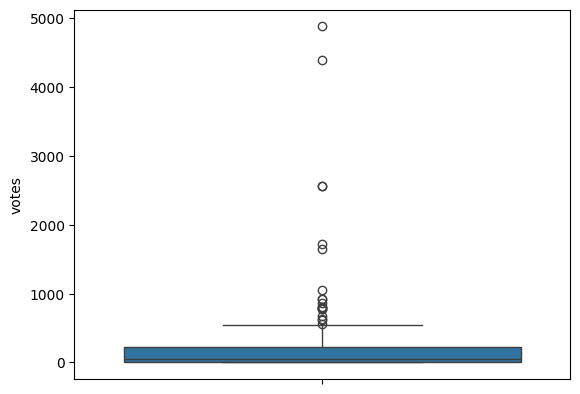

In [6]:
g=sns.boxplot(df['votes'])

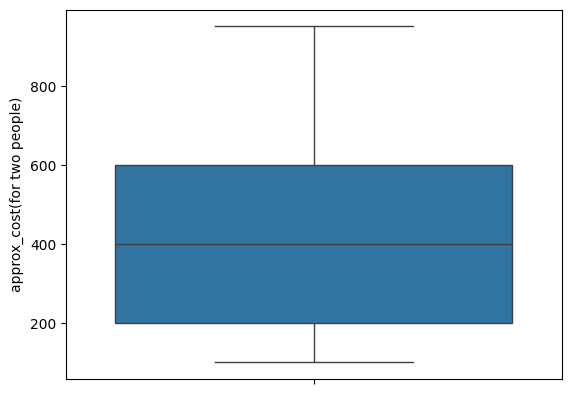

In [7]:
g2=sns.boxplot(df['approx_cost(for two people)'])

In [8]:
df['log_votes'] = np.log1p(df['votes'])

In [9]:
q1=df['log_votes'].quantile(0.25)
q3=df['log_votes'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df_clean=df[(df['log_votes']>=lower_bound) & (df['log_votes']<=upper_bound)]

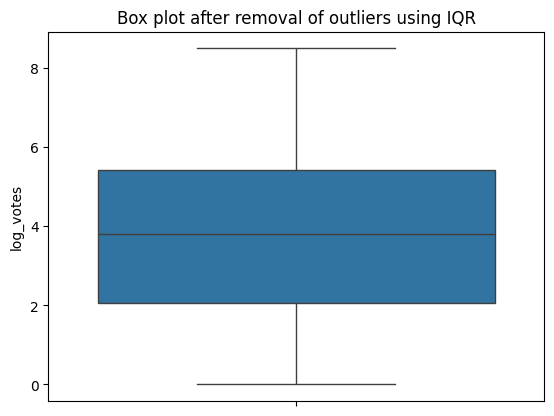

In [10]:
sns.boxplot(df_clean['log_votes'])
plt.title('Box plot after removal of outliers using IQR')
plt.show()

In [11]:

df['z_score_votes'] = stats.zscore(df['log_votes'])

df_filtered_zscore = df[(df['z_score_votes'].abs() <= 3)]


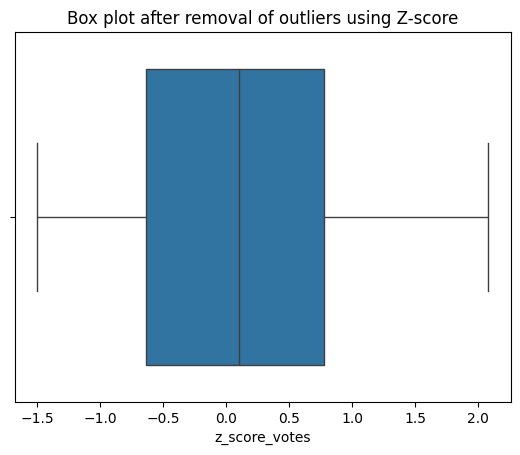

In [12]:
sns.boxplot(x='z_score_votes',data=df_filtered_zscore)
plt.title('Box plot after removal of outliers using Z-score')
plt.show()